# Biomockup


## Introduction
Biomockup is a programming model inspired on biomolecular evolving interactions.

The traditional programming languages allow the explicit definition of the tasks to be performed, down to the smallest detail. The behavior of the programs is deterministic, the same result will always be obtained if the same program is used with the same input data.

This behavior also has practically no tolerance for programming errors: normally, any coding error leads to an alteration of the functionality for which the program has been built, often even a complete suppression of its functionality, through degraded performance in performance or degraded in terms of the operation logic, which is manifested by the correct execution under some sets of input parameters and incorrect in other cases. We will come back to this topic later.

There is therefore a kind of implicit bijection between coding and function.
This operating paradigm has proved adequate in a broad spectrum of practical applications. Wherever it has been necessary to implement strategies where it is not desirable to code everything (automatic learning by reinforcement in any of its incarnations, for example), the starting point has always been a traditional programming language, completely bijective.

The observation of the behavior of the logical system which seems to scaffold the life, constituted by networks of interaction between proteins, nucleic acids, ligands and residues of all kinds, inspires us to try another approach based in graph theory.

Our goal is to construct a model of *graphs modifying graphs* that encapsulates some of the logic that we find in molecular biology.

## Proteins: bijection rupture.

The first observation is related to the synthesis of proteins. Their function has a lax dependence on the DNA coding sequence of their original gene, so that in many cases, proteins that only reflect a 30% identity percentage also perform the same function.

The correspondence between the function of the protein and the coding in the gene is rather *suprayective*: the same function is obtained from different initial codings.

The cell achieves this result from the three-dimensional conformation of the protein. The function is not directly expressed in the gene, which is not more than a linear structure (1D), but is achieved by restructuring in space (3D) the amino acid sequence that results from the translation, as if in some way there was a *multidimensional information implicit in the gene*.

This multidimensional information, we know that it is determined by the information 1D, but we also know that the reciprocal is not true: the information of the 3D structure can be related to many linear structures of departure.

A more detailed look to protein folding reveals two logical aspects that we want to emulate:
 
1) The folding takes place by the generation of new physical interactions: hydrogen bonds, van der waals forces, disulfure bridges,.... So creating new relations between amino acids.

2) This folding generates a *emergence of function* based in the emergence of surface structures that enable the protein to bind to another molecules. This emergence doesn't takes place into the region of internal interaction, but is a consequence of that internal interaction. So, the *logic* of folding operates in a region, and the function appears in other. This is a crucial difference with the programming paradigm of a IT  human language: the functionality of an algorithm emerges exactly where the code operates. 

*NOTE: we are aware that this comparison between life-IT and human-IT is largely naive. It has to be understood as a mere heuristic analogy, without more pretensions*.


### Interaction model.

Our central idea is to build a linear model of programming blocks (DNA) that undergo a structural transformation to a 2D network. The function will be associated with the appearance of certain motifs within this 2D model. The configuration of this 1D model to 2D will depend on certain predefined interactions between the constituent blocks of our *DNA program*, which we will parameterize in various ways, exploring the possibilities. We will call this parameterization **interaction model (MI)**.

The 2D model will be represented by a graph, which will be generated from structure 1D and MI. We will explore networks with weight between the nodes, the structures based on attractive or repulsive forces and, combined or not with these strategies, the convenience of using hypergraphs and graphs of graphs.

The objective is that the graph is generated automatically from the MI and the linear sequences. The linear sequences are also represented by graphs with nodes connected in a consecutive way.

Well, really the model doesn't speak on dimensions, but on *relations*. A relation between two constituent pieces of DNA (nodes) is represented by an edge of the graph.

The transition from the linear model (regular graph of constant degree 2) is accomplished by the generation of new interactions (creation of new edges between nodes).

An example of interaction model is:

With three types of nodes:

1. N: null generators

2. W: weak generators or short distance generators: generate relation with nodes S,W,N at a distance 3 to 6

3. S: strong generators or long distance generators : generate relation with nodes S at a distance 10 to 15

The computation of the new edges (relations) need be done in a iterative way, because the node distances are modified in every interaction. For instance, the W-generators probably will approach some nodes to the strong generators, otherwise unattainable. It's possible that several models doesn't converge in all the cases.

Note: in this model, we don't take into account, the transcriptional and traslational biological processes, nor their regulation. Our graph DNA is composed yet by amino acid. We only want to emulate the postraslational folding.

### Operation model 

Or external interaction model. Is the model that makes a protein to bin to another molecule, that enables a graph to bind to another graph. So, it's related with the function.

Once the graph has been obtained from the linear sequence and the MI, it will be necessary to explore this graph in search of structures that are associated with predefined functions. This model that associates reasons with functions is called the operation model (MO).

The search for structures in the network will be implemented by existing specialized software or by our own software if we do not find anything that fits our needs.

How is the operation model defined? The functions that are going to be associated with each motif are going to be somewhat irrelevant for this project. We could simply label them to imply that they are different from each other. However, we will try to make some association with practical meaning in order to illustrate better what we are doing.

But by analogy from life the function is attained by the capability of associate a *protein*  with another piece: protein, DNA, ..., or in our logic abstraction, where all this things are networks,  
we need to define an affinity between graphs. In other words, two graphs can bind if both contain some kind of similar subgraphs: k-cores, cliques, ... We don't now at this moment. 

# Project goals

Explore several implementations of MI and MO and analyze the resulting graphs, in an evolutionary context:

1. Identification of emerging structures.

2. Fault tolerance. Ability of the model to admit random mutations (errors) in the sequence of the initial graph, keeping the previously identified emergent structures.

3. Ease to generate new emerging structures (phase changes?).


*Note: this is actually a first piece of an evolution model where fault tolerance allows several versions of the same network to be maintained in a population of graphs, some of them very close to certain phase transitions that would enable the population to generate quickly new functions after changes in environmental restrictions. This evolutionary model could be applied, if we are lucky enough, to the implementation of reinforcement learning strategies and to understand how new functions can emerge surprisingly in highly fault tolerant systems, apparently conservative and thus not prone to functional changes.*

# Example of regular *DNA* graph

In this simple example we show the design patterns that we are going to follow.
Although we use the **networkx** package broadly, we have renounced to use all its possibilities in terms of data storage, in order to facilitate a possible future migration to another package.

That's why our basic model will consist of three pieces, the graphic object (networkx object), the list of labels associated with each node and the list of colors associated with each node. This former list is generated automatically from the labels but it is used precalculated to call many of the methods, as you will see.

A possible improvement is to build a class that encapsulates this type of objects.

In this example we generate a simple, linear network, where each node is connected to the previous one and the one that happens to it. We have three types of nodes that would be equivalent to the DNA nucleotide types.

Of this type will be the our starting networks.

['yellow', 'blue', 'red', 'blue', 'red', 'blue']


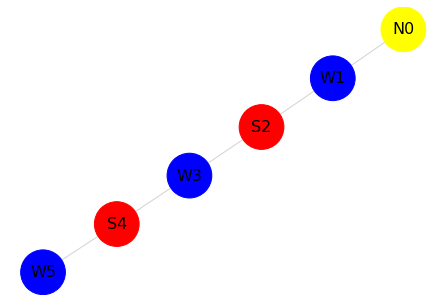

In [54]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import string
import pandas as pd
# This is a linear regular graph model, the DNA equivalent
G=nx.Graph(name="DNA")
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5)])
labels = {}
labels[0] = 'N0'
labels[1] = 'W1'
labels[2] = 'S2'
labels[3] = 'W3'
labels[4] = 'S4'
labels[5] = 'W5'

colors = []
for label in labels.values():
    if label[0] == "N":
        colors.append("yellow")
    elif label[0] == "S":
        colors.append("red")
    elif label[0] == "W":
        colors.append("blue")

pos = nx.kamada_kawai_layout(G)
print(colors)
nx.draw(G, pos, with_labels = False, node_color = colors, edge_color = "lightgray", node_size=2000)
nx.draw_networkx_labels(G,pos,labels,font_size = 16);

# Model

## Genoids

Our first entity in our model is the **genoid**, that is the equivalent of a coding gene. The genoid is composed of an arbitrary number of **nucleoids**, as nucleotides are the constituent parts of a gene. The genoid is a ordered sequence of nucleoids.

The nucleoids could have an arbitrary number of **nucleoid types**, as biological nucleotides could be adenine, guanine, ...

In our model we simplify the types to a set of cardinality three: **neutral(N)**, **weak(W)** and **strong(S)** interactors.

The genoids are represented by not periodical unidimensional graph meshes. Each node in the graph is a nucleoid.

Each nucleoid is assigned a **nucleoid code**, formed by the concatenation of the nucleoid_type and his sequence number within the genoid.

Also a genoid can be represented as a **genoid sequence**, the string formed by the ordered concatenation of nucleoid types.

A **subgenoid** of a given genoid is a genoid formed by a subset of the genoid nucleoids, not necessarily consecutive.

A genoid could be created from genoid sequence by means of method *genoid_from_sequence*.

But, really a genoid is an object (but not formally implemented as a class instance) composed by data types: the graph, the array of labels ```genoid_codes```, and the array of colors (see [3]).

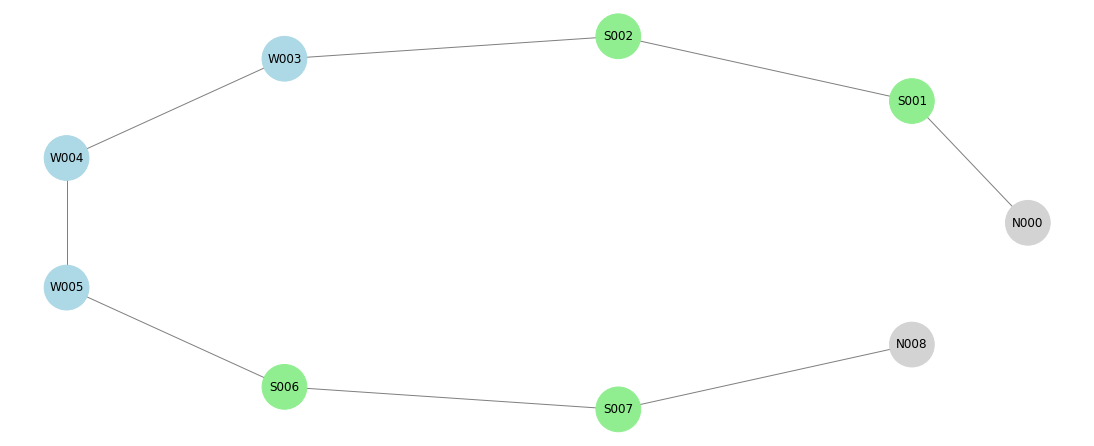

In [55]:
# Constants related to ploting
NODE_SIZE_1 = 2000 # Node size for nx.graph
FONT_SIZE_1 = 12 # Font size for nx.graph
FIGSIZE_1 = (15, 6) # Figure size for ploting
EDGE_COLOR = "gray" # Edge color
NUCLEOID_MASK = "{:03d}"

# Methods
def get_graph_metrics(graph):
    """
    Generate main metrics of a networkx graph
        
    Parameters:
        graph: graph networkx object
    Returns:
        float: The clustering index (C)
        float: Average shortest path length (L)
        float: Order of the largest connected component (O)
        
    """
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()

def asign_color(nucleoid_type):
    """
    Asign color by nucleoid type
    """
    if nucleoid_type == "N":
        color = "lightgray"
    elif nucleoid_type == "S":
        color = "lightgreen"
    elif nucleoid_type == "W":
        color = "lightblue"
    else:
        color = "white"
    return color
        
def genoid_from_sequence(genoid_sequence):
    """ 
    Create nonperiodic unidimensional grid according to genoid string
    Genoid string is a sequence of N, W and S
    """
    genoid = nx.Graph(name="DNA")
    i = 0
    nucleoid_codes = {}
    nucleoid_colors = []
    for nucleoid_type in genoid_sequence:
        if i >= 1:
            genoid.add_edges_from([(i-1, i)])
        nucleoid_codes[i] = nucleoid_type + NUCLEOID_MASK.format(i)
        nucleoid_colors.append(asign_color(nucleoid_type))
        i += 1
    return genoid, nucleoid_codes, nucleoid_colors

def plot_genoid(genoid, nucleoid_codes, nucleoid_colors):
    """
    Plot genoid
    """
    plt.figure(figsize=FIGSIZE_1)
    pos = nx.circular_layout(genoid)
    nx.draw(genoid, pos=nx.circular_layout(genoid), with_labels=False, 
            node_color=nucleoid_colors, edge_color=EDGE_COLOR, node_size=NODE_SIZE_1)
    nx.draw_networkx_labels(genoid, pos, nucleoid_codes, font_size=FONT_SIZE_1);

def plot_subgenoid(genoid, subgenoid, genoid_codes, genoid_colors):
    """
    Plot subgenoid
    """
    subgenoid_nodes = subgenoid.nodes()
    subgenoid_codes = {i:genoid_codes[i] for i in subgenoid_nodes}
    subgenoid_colors = [genoid_colors[i] for i in subgenoid_nodes]
    plot_genoid(subgenoid, subgenoid_codes, subgenoid_colors)
    
genoid, genoid_codes, genoid_colors = genoid_from_sequence("NSSWWWSSN")
plot_genoid(genoid, genoid_codes, genoid_colors)

Each node is asigned a label format by the genoid type and an integer that matches with the node index and accordingly to the ```NUCLEOID_MASK```. By default we create networks from 0 to 1000 nodes, that is enough for our goals.

## Proteoids

Proteoid is the proteoic equivalent of our model. We can say that the genoid is to the gene as the proteoid is to the protein.

But our model simplifies, or rather, ignores a part of the biological steps involved on protein building from the gene (central dogma), namely:

1. Alternative splicing.
2. Transcription.
3. Translation on the conversion of three nucleotides into an amino acid.
4. Post-translational modifications.

In fact, our nucleoid is still the constituent node of the proteoid, just as it was in the genoid. How is the proteoid different from the genoid it comes from? Simply by means of the new relationships (edges) that are established between the nodes. In a proteoid there are relations between non-consecutive nodes, and this does emulate in a certain way what happens in nature, where the physical and chemical forces fold the linear aminoacidic chain, establishing links between non-adjacent nodes: van der Waals forces, hydrogen bridges, disulfide bonds, ...

The ```generate _proteoid``` method houses the magic to make this pseudo-folding possible from a genoid_ sequence and according to a rule.

A rule (of folding or of relation) is a string that of compact form contains the information to generate the additional edges in a genoid, i.e., to generate the relations between nodes that are not consecutive.

The rules consist of several sub-rules separated by pipes. Each one of them consists of four parts separated by underscores:

1. Source node type (N, W or S)
2. Destination node types (N, NW, NWS, ...)
3. An integer indicating the minimum distance ```nx.shortest _path_ length``` to which a destination node of the source node must be in order to be linked.
4. An integer indicating the maximum distance ```nx.shortest _path_ length``` to which a destination node of the source node must be in order to be linked.

For example, this rule ```W _WN_ 3 _5 | S_ S _10_ 30``` tells the generator to build edges:

1. Between any source node W and all nodes W and N that are greater than or equal to 3 and less than or equal to 5.

2. Between any source node S and all the nodes S that are at a distance greater than or equal to 10 and less than or equal to 30.
We can also build a proteoid from a genoid already created, using the ```proteoid _from_ genoid``` method.

Combining this with the method ```random _genoid_ sequence``` we can generate genoids and proteoids randomly. This method is passed a probability string that also indicates, in a compact and visual way, the probabilities that a node will appear in the sequence. Thus "NWS" makes all types of nodes are equiprobable and "NWWSSS" causes that the nodes W are twice as likely as the N and S are triple the W.

## Mutations

Our basic networks genoids and proteoids can be modified by mutation events. By analogy with molecular biology, these mutations consist of one or more changes of the type of nucleoid within a genoid. So we do not take into account mutations that change nucleoids into proteoids. _In this model also we don't deal about deletions._

The ```mutate _genoid_ sequence``` method allows us to generate nucleoid type changes in a genoid. We can indicate the number of mutations that we want and a chain that represents the probability of change in a compact way, much like we did in the random generation. Thus "NWS" makes all the mutations from a given nucleoid are equiprobable and "NWWSSS" causes a node to have twice the probability of mutating towards W than towards N and three fold the probability of mutating to S than towards N.

### Fitness consequences.

Now let's say that we have mutated a genoid and computed the corresponding proteoid. The result of a mutation on a genoid of 30 nucleoids is seen in the next output cell. We see how the edges have "moved" from the left area of the proteoid to the right area, roughly. Here we have applied 10 mutations with the basic probability string ("NWS") to a randomly obtained genoid "SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN".

And the key moment arrives to design one of the biological gears that pretends to mock our model, what kind of mutations generate something different (a proteoid able to do other things), i.e., what mutations would have fitness consequences.

For this we have to define what we consider by function or perhaps, more easily, what characteristics of our proteoids we associate with a certain function. Otherwise, which criterion could we establish to hold that a proteoid would perform the same function as another proteoid structurally different, or more compactly, what do we understand by functional equality of proteoids.

How could us define the equality of proteoids?. Many ways occur to us, but here we have explored only one, which attributes equality to the fact that one or more graph metrics are coincident within certain tolerance margins.

The tolerances are expressed in percentages that affect the indicated metrics

A typical tolerance would be represented by the following dictionary: ```{'W': 10, 'N': 20, 'S': 10, 'avg _degree': 20, 'min_ degree': 10```, which means that two proteoids are equivalent (functionally) if the number of W nodes differs by less than 10%, the number of N nucleoids by less than 20%, the number of S nucleoids in less than 10%, the average degree in less than 10% and the minimum degree in less than 10%.

The ```compare _proteoid_ structs``` function is the main function responsible for comparisons and is supported by several instrumental functions.

In the following examples we reproduce a mutation with fitness consequences according to this definition of tolerances and a mutation without them. We see that visually the second of the mutations gives us a feeling of greater similarity. Therefore we take the model as good in the first instance.

In [99]:
# Constants
NODES = "SWN"
def proteoid_from_genoid(genoid, genoid_codes, rule):
    """ 
    Create relations(edges) into a genoid according to rules, so transforming in a proteoid
    """
    edges_added = {}
    rules = rule.split("|")
    proteoid = genoid.copy()
    for i in range(genoid.order()):
        for generator in rules:
            [nucleoid_type, nucleoid_fin, distance_ini, distance_fin] = generator.split("_")
            distance_ini = int(distance_ini)
            distance_fin = int(distance_fin)
            if genoid_codes[i][0] == nucleoid_type:
                for j in range(i+1, genoid.order()):
                    distance = nx.shortest_path_length(genoid, source=i, target=j)
                    if distance <=distance_fin and distance >= distance_ini and genoid_codes[j][0] in nucleoid_fin:
                        proteoid.add_edges_from([(i, j)])
                        if nucleoid_type in edges_added:
                            edges_added[nucleoid_type] += 1
                        else:
                            edges_added[nucleoid_type] = 1
    return proteoid, genoid_codes

def generate_proteoid(genoid_sequence, rule, plot=False):
    """
    Generate proteoid from genoid_sequence according to rule
    """
    genoid, genoid_codes, proteoid_colors = genoid_from_sequence(genoid_sequence)
    proteoid, proteoid_codes = proteoid_from_genoid(genoid, genoid_codes, rule=rule)
    if plot:
        plot_genoid(proteoid, proteoid_codes, proteoid_colors)
    proteoid_core = nx.k_core(proteoid, k=None, core_number=None)
    proteoid_core_number = nx.core_number(proteoid)
    m = max(proteoid_core_number, key=proteoid_core_number.get)
    proteoid_core_degree = proteoid_core_number[m]
    c, l, o = get_graph_metrics(proteoid_core)
    return c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors

def random_genoid_sequence(probability_string="NWS", length=20):
    """Generate a random genoid sequence of fixed length and composition"""
    return ''.join(random.choice(probability_string) for i in range(length))

def mutate_genoid_sequence(genoid_sequence, mutations=1, probability_string="NWS"):
    """Generate n mutations in genoid_sequence"""
    genoid_sequence_mutated = list(genoid_sequence)
    for mutation in range(mutations):
        mutation_pos = random.randint(0, len(genoid_sequence) - 1)
        #print("M", mutation_pos, genoid_sequence_mutated)
        probability_string_filtered = ''.join(c for c in probability_string if c != genoid_sequence_mutated[mutation_pos])
        mutation_char = random.choice(probability_string_filtered)
        #print(mutation_pos, probability_string_filtered, genoid_sequence_mutated[mutation_pos] , "->", mutation_char)
        genoid_sequence_mutated[mutation_pos] = mutation_char
    return ''.join(genoid_sequence_mutated)

def has_tolerance(metric, struct1, struct2, tolerance, verbose=True):
    """
    Retuns if a metric from functional struct1 and functional struct2 are similar 
    between a certain tolerance interval
    """
    if verbose: print("##### Has tolerance")
    has_tolerance = True
    if metric in struct1 and metric in struct2:
        m = max(struct1[metric], struct2[metric])
        tolerance = round(int(tolerance)*m/100.0)
        if verbose: print("has_tolerance", struct1[metric], struct2[metric], "Dif:", abs(struct1[metric] - struct2[metric]), "Tolerance", tolerance)
        if abs(struct1[metric] - struct2[metric]) > tolerance:
            has_tolerance = False
            if verbose: print("Tolerance not verified on " + metric + " tolerance " + str(tolerance), struct1[metric], struct2[metric])
        else:
            if verbose: print("Tolerance verified on " + metric + " tolerance " + str(tolerance))
    elif metric not in struct1 and metric not in struct2:
        has_tolerance = True
        if verbose: print("Tolerance verified on " + metric)
    else:
        has_tolerance = False
        if verbose: print("Tolerance not verified on " + metric)
    return has_tolerance

def get_proteoid_functional_struct(proteoid, proteoid_codes):
    """
    Obtain the functional structure of a proteoid
    """
    proteoid_structure = {}
    nucleoid_types = [proteoid_codes[i][0] for i in proteoid_codes.keys() if i in proteoid.nodes()]
    #print("----------nucleoid_types", nucleoid_types)
    for nucleoid_type in NODES:
        proteoid_structure[nucleoid_type] = 0
    for nucleoid_type in nucleoid_types:
        proteoid_structure[nucleoid_type] += 1
    proteoid_structure["avg_degree"] = sum(degree for _, degree in proteoid.degree())/proteoid.order()
    proteoid_structure["min_degree"] = min(degree for _, degree in proteoid.degree())
    return proteoid_structure

def compare_proteoid_structs(tolerances, proteoid1, proteoid2, proteoid_codes1, proteoid_codes2, verbose=True):
    """ 
    Similarity of genoids by comparing functional structures according to tolerances
    Based on number of nodes W, N, S, the minimun degree and the overall degree with tolerances
    """
    struct1 = get_proteoid_functional_struct(proteoid1, proteoid_codes1)
    struct2 = get_proteoid_functional_struct(proteoid2, proteoid_codes2)
    if verbose:
        print("")
        print("struct1", struct1)
        print("struct2", struct2)
    for metric in tolerances.keys():
        metric_tolerance = tolerances[metric]
        verify_metric = has_tolerance(metric, struct1, struct2, metric_tolerance, verbose)
        if not verify_metric: return False
    return True

### Mutation with fitness consequences

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
SNSNWSSNNWWSNNSNNSNNNNSNNNNNNN 30
{'S': 6, 'W': 6, 'N': 3, 'avg_degree': 3.6, 'min_degree': 3}
{'S': 8, 'W': 3, 'N': 4, 'avg_degree': 3.7333333333333334, 'min_degree': 3}
Mutation with fitness consequences? True


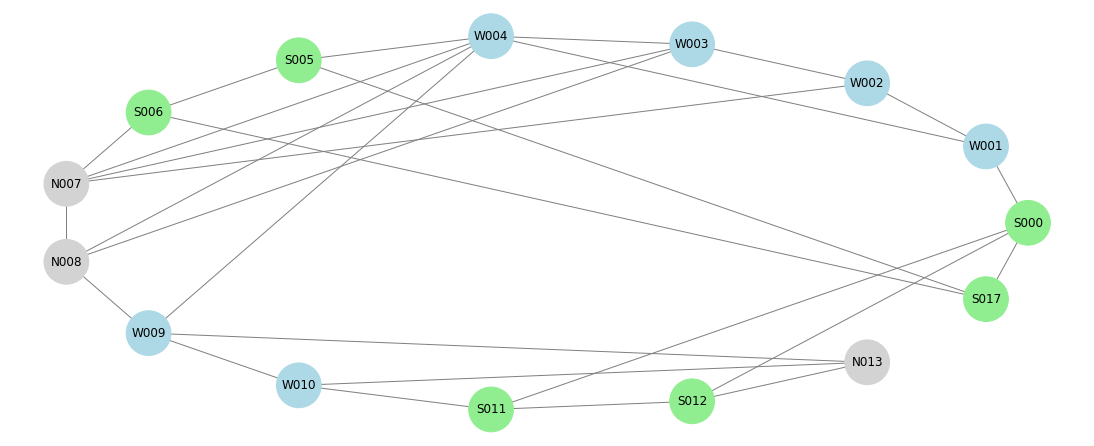

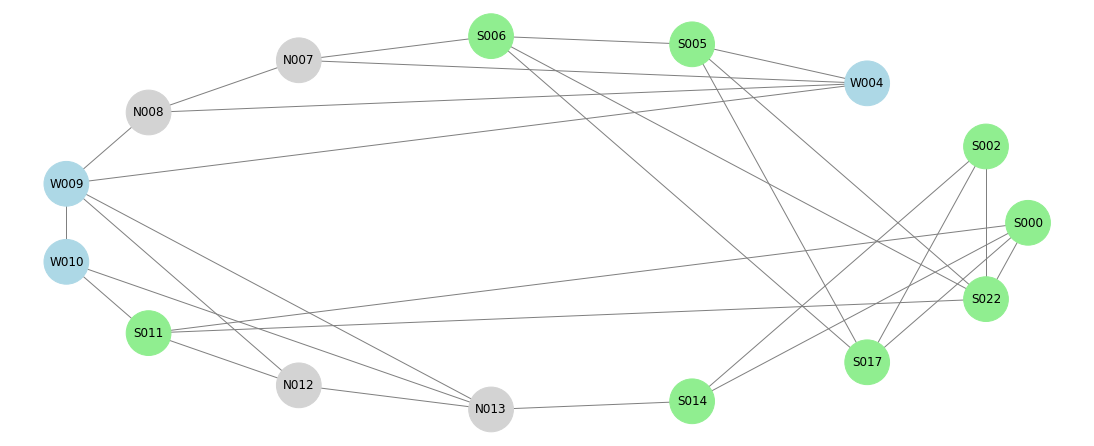

In [76]:
random.seed(20)
genoid_sequence = random_genoid_sequence("NNNNNNNNNNWWWSS", 30) 
print(genoid_sequence, len(genoid_sequence))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors =\
    generate_proteoid(genoid_sequence, rule, plot=False)
plot_subgenoid(proteoid, proteoid_core, proteoid_codes, proteoid_colors)

genoid_sequence_mutated = mutate_genoid_sequence(genoid_sequence, mutations=10, probability_string="NWS")
print(genoid_sequence_mutated, len(genoid_sequence_mutated))
c, l, o, proteoid_core_mutated, proteoid_core_mutated_degree, proteoid_mutated, proteoid_codes_mutated, proteoid_colors_mutated =\
    generate_proteoid(genoid_sequence_mutated, rule, plot=False)
plot_subgenoid(proteoid_mutated, proteoid_core_mutated, proteoid_codes_mutated, proteoid_colors_mutated)

struct_proteoid = get_proteoid_functional_struct(proteoid_core, proteoid_codes)
struct_proteoid_mutated = get_proteoid_functional_struct(proteoid_core_mutated, proteoid_codes_mutated)
print(struct_proteoid)
print(struct_proteoid_mutated)
tolerances = {'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10}
similarity = compare_proteoid_structs(tolerances, proteoid_core, proteoid_core_mutated, proteoid_codes, proteoid_codes_mutated, verbose=False)
print("Mutation with fitness consequences?", not similarity)

### Mutation without fitness consequences

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
SWWWWSNNNWWSSNSNNSNNNNNNNNNNNN 30
{'S': 6, 'W': 6, 'N': 3, 'avg_degree': 3.6, 'min_degree': 3}
{'S': 3, 'W': 6, 'N': 4, 'avg_degree': 3.8461538461538463, 'min_degree': 3}
Mutation with fitness consequences: True


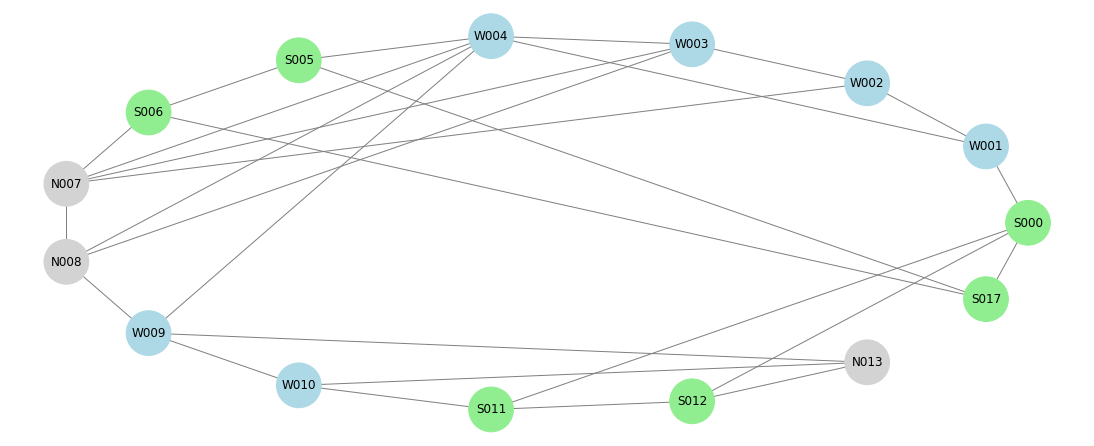

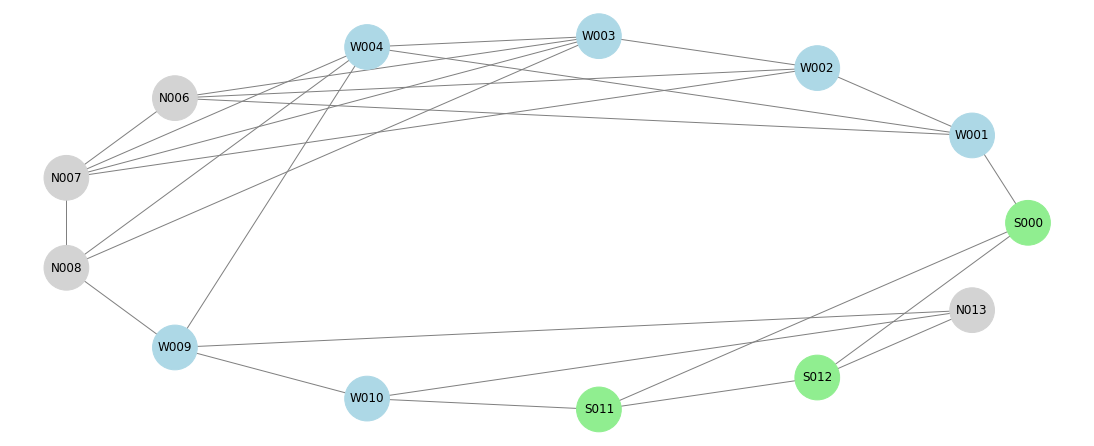

In [67]:
random.seed(20)
genoid_sequence = random_genoid_sequence("NNNNNNNNNNWWWSS", 30) 
print(genoid_sequence, len(genoid_sequence))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, proteoid_core, proteoid_core_degree, proteoid, proteoid_codes, proteoid_colors =\
    generate_proteoid(genoid_sequence, rule, plot=False)
plot_subgenoid(proteoid, proteoid_core, proteoid_codes, proteoid_colors)

genoid_sequence_mutated = mutate_genoid_sequence(genoid_sequence, mutations=1, probability_string="NWS")
print(genoid_sequence_mutated, len(genoid_sequence_mutated))
c, l, o, proteoid_core_mutated, proteoid_core_mutated_degree, proteoid_mutated, proteoid_codes_mutated, proteoid_colors_mutated =\
    generate_proteoid(genoid_sequence_mutated, rule, plot=False)
plot_subgenoid(proteoid_mutated, proteoid_core_mutated, proteoid_codes_mutated, proteoid_colors_mutated)

struct_proteoid = get_proteoid_functional_struct(proteoid_core, proteoid_codes)
struct_proteoid_mutated = get_proteoid_functional_struct(proteoid_core_mutated, proteoid_codes_mutated)
print(struct_proteoid)
print(struct_proteoid_mutated)
tolerances = {'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10}
similarity = compare_proteoid_structs(tolerances, proteoid_core, proteoid_core_mutated, proteoid_codes, proteoid_codes_mutated, verbose=False)
print("Mutation with fitness consequences:", not similarity)

## Main cores

Surely you have noticed that in the previous drawings do not appear all the nodes ($30$). What is the criterion to only paint the ones that are shown?.

We only painted the core of the proteoid, according to the method called ```nx.k_core``` without parameters, that is, we only painted the main k-core of the proteoid, which is the most dense in relations. We consider, *by definition*, this part of the proteoid as the functionally relevant part. And the comparison rules always apply to the main cores of the proteoids that are being compared`

## Mutation cycles

And we get to the point where we want to study how cycles of mutations affect a genoid-proteoid structure, how easily fitness can be broken, or otherwise, how easily the system supports several proteoid versions functionally equivalent.

If our model can be useful for future developments of evolutionary research, we hope that for certain parameter values equivalent structures can arise in spite of the mutations. It seems obvious that it will be relatively easy to obtain non-equivalent structures.

This is what the ```mutation_cycle``` function does, which launches the simulation of a configurable series of mutations, according to configurable tolerances, and a number of mutations per configurable cycle.

In each step we compare the proteoid (better said, its main core), with the main core of the previous proteoid. If you have not had fitness consequences, we indicate it in False in the table and in bold in the sequence above each chart. If you had fitness consequences, we indicated it to True and in the green chart.

In the graphic, the main cores of each mutation step are painted.

We simulate two cycles on the same starting sequence, the first with a mutation rate equal to 1 and the second with the rate equal to 10.

Despite the difference in these rates, a similar capacity to admit changes without fitness consequences is also observed in the second system.

In [109]:
def plot_graph2(graph, labels, colors, axis, title, title_color):
    """
    Plot graph
    """
    plt.sca(axis)
    axis.set_axis_off()
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos=nx.circular_layout(graph), ax=axis, with_labels = False, node_color=colors, edge_color="gray", node_size=2000)
    nx.draw_networkx_labels(graph, pos, labels, ax=axis, font_size=10)
    plt.title(title, color=title_color, fontsize=9)

def plot_subgraph2(graph, subgraph, graph_labels, graph_colors, axis, title, title_color):
    """
    Plot subgraph
    """
    subgraph_nodes = subgraph.nodes()
    subgraph_labels = {i:graph_labels[i] for i in subgraph_nodes}
    subgraph_colors = [graph_colors[i] for i in subgraph_nodes]
    plot_graph2(subgraph, subgraph_labels, subgraph_colors, axis, title, title_color)

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val else 'black'
    return 'color: %s' % color

def mutation_cycle(graph, c, l, k_core, node_string, labels, colors, tolerances, mutation_step, mutations_count, probability_string="NWS"):
    """
    """
    assert mutations_count >= 1, "Parameter mutations_count must be greater than 0"
    df = pd.DataFrame(columns=['genoid', 'fitcons','N', 'W', 'S', 'min_degree', 'avg_degree', 'order', 'size', 'C', 'L'])
    plot_row = 4
    mutations = {}
    # Add original genoid allele
    mutations_count += 1
    node_string_mutated = node_string
    genoid_orig = get_proteoid_functional_struct(k_core, labels)
    genoid_orig['genoid'] = node_string
    genoid_orig['fitcons'] = False
    genoid_orig['order'] = k_core.order()
    genoid_orig['size'] = k_core.size()
    genoid_orig['C'] = c
    genoid_orig['L'] = l
    df = df.append(genoid_orig, ignore_index=True)
    row_grid = int(mutations_count/plot_row) + 1
    if mutations_count%plot_row == 0: row_grid -= 1
    #print(row_grid)
    plt.axis('off')
    fig, axs = plt.subplots(row_grid, plot_row, figsize=(22, 8*row_grid))
    if row_grid == 1:
        axis = axs[0]
    else:
        axis = axs[0, 0]
    plot_subgraph2(graph, k_core, labels, colors, axis, node_string, "black")
    #print(axs)
    k_core_mutated = k_core.copy()
    labels_mutated = labels
    for mutation in range(1, mutations_count):
        node_string_mutated = mutate_genoid_sequence(node_string_mutated, mutations=mutation_step, probability_string=probability_string)
        # Previous k_core and labels
        k_core = k_core_mutated.copy()
        labels = labels_mutated
        c, l, o, k_core_mutated, k_core_mutated_degree, graph_mutated, labels_mutated, colors = generate_proteoid(node_string_mutated, rule, plot=False)
        if row_grid == 1:
            axis = axs[mutation]
        else:
            axis = axs[int(mutation/plot_row), int(mutation%plot_row)]
        s_mutated = get_proteoid_functional_struct(k_core_mutated, labels_mutated)
        consequences = not compare_proteoid_structs(tolerances, k_core, k_core_mutated, labels, labels_mutated, verbose=False)
        if consequences: color = "darkgreen"
        else: color = "black"
        plot_subgraph2(graph_mutated, k_core_mutated, labels_mutated, colors, axis, node_string_mutated, color)
        #print(node_string_mutated, "Function", s_mutated, "Consequences", consequences)
        s_mutated['genoid'] = node_string_mutated
        s_mutated['fitcons'] = consequences
        s_mutated['order'] = k_core_mutated.order()
        s_mutated['size'] = k_core_mutated.size()
        s_mutated['C'] = c
        s_mutated['L'] = l
        df = df.append(s_mutated, ignore_index=True)
    for i in range(int(mutations_count%plot_row), plot_row):
        if row_grid == 1:
            axis = axs[i]
        else:
            axis = axs[row_grid - 1, i]
        axis.set_axis_off()
    print(df)
#     display(df.style.applymap(color_negative_red, subset=['fitcons']).
#             format("{:.2f}", subset=['avg_degree', 'C', 'L']).
#             hide_index().
#             set_properties(**{'text-align': 'left', 'font-family' : 'courier'}))
    plt.show()

### Mutation cycle with low mutation rate

                                      genoid fitcons  N  W  S min_degree  \
0   SWWWWSSNNWWSSNSNNSNNNNNNNNNNNNNNNWSWNNNN   False  6  8  8          3   
1   SWWWWSSNNWWSSNSNNSNNNNNNNNNNNNNNNSSWNNNN    True  0  0  5          4   
2   SWWWWSSNNWWSSNSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
3   SWWWWSSNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
4   SWNWWSSNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
5   SWNWWSNNNWWSSWSNNSNNNNNNNWNNNNNNNSSWNNNN    True  5  6  8          3   
6   SWNWWSNNNWWSWWSNNSNNNNNNNWNNNNNNNSSWNNNN   False  5  7  7          3   
7   SWNWWSNNNWWSWWSNNSSNNNNNNWNNNNNNNSSWNNNN    True  0  0  5          4   
8   SWNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNN   False  0  0  5          4   
9   SWNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNW   False  0  0  5          4   
10  SSNWWSNNNWWSWWSNWSSNNNNNNWNNNNNNNSSWNNNW    True  0  0  9          4   
11  SSNWWSNNNWWSWWNNWSSNNNNNNWNNNNNNNSSWNNNW    True  2  5  8          4   
12  SSNWWSNN

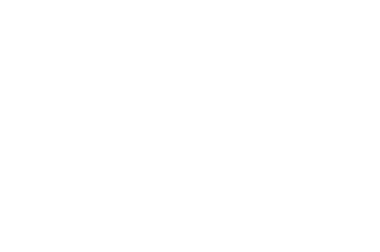

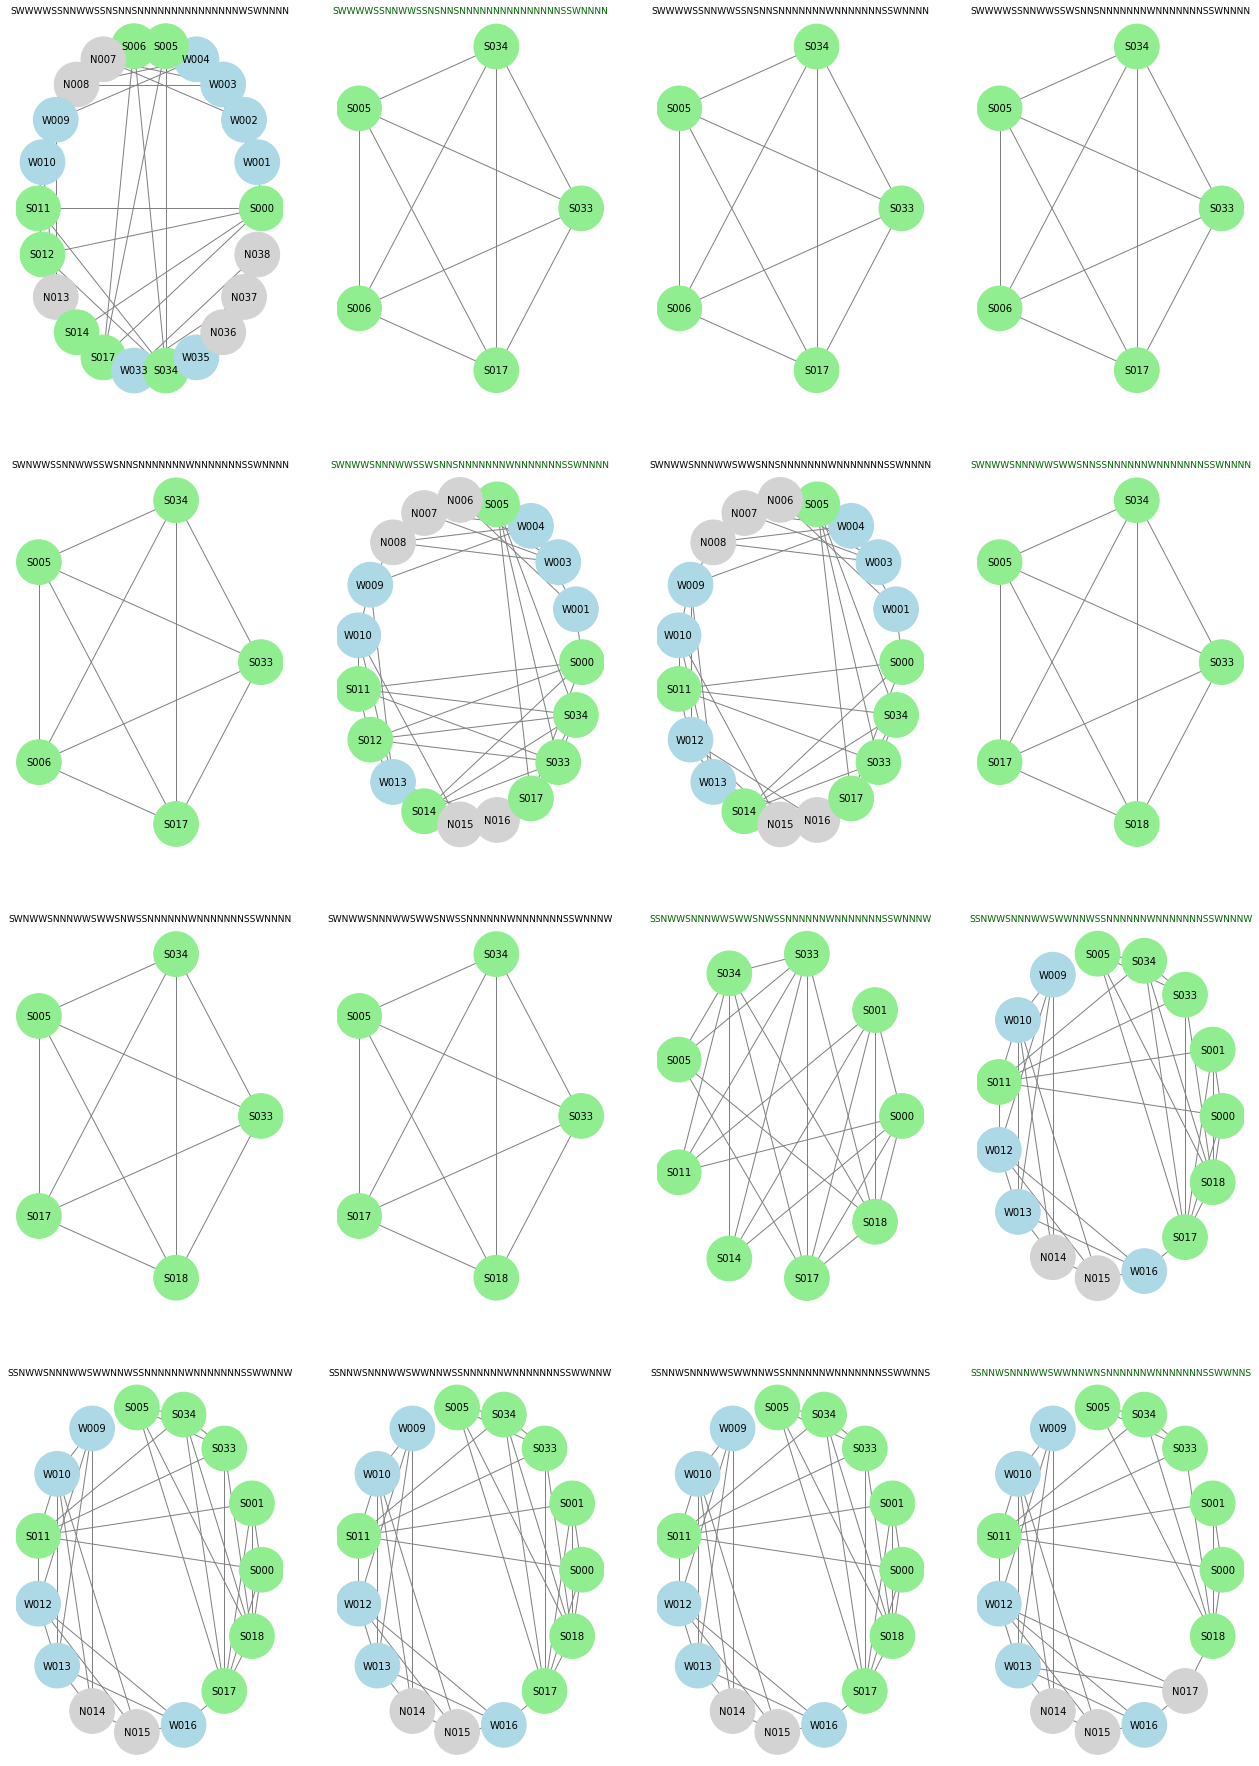

In [110]:
random.seed(20)
node_string = random_genoid_sequence("NNNNNNNNNNWWWSS", 40) 
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_proteoid(node_string, rule, plot=False)
tolerances = {'W':20, 'N':50, 'S':10, 'avg_degree':10, 'min_degree':10}
probability_string = "NWS"
mutation_cycle(graph, c, l, k_core, node_string, labels, colors, tolerances,
               mutation_step=1, mutations_count=15, probability_string=probability_string)

### Mutation cycle with high mutation rate

                                      genoid fitcons  N   W   S min_degree  \
0   NNNWSNNWWNNNWSSWWNNWWWWNSSWNNSNNNNNNNNNN   False  4  11   6          3   
1   NSNNSNNWWSWNWSNWWWNWWSWNSSWNNSNNNNNSWNNS    True  2  10  10          4   
2   SSNNSNNSSSNWWSNWWWNWWSNNSNWWNSNNNWNSWNNS    True  0   0  11          5   
3   NNNNSSNSSSWWWSNWNWNNWSNNSSWWNWNNNNNSNNNS    True  0   0  11          4   
4   NNNNSSNSSSNWWSNNNWNNWSNNSSSWNWNNNWNSNNNS    True  0   0  12          5   
5   SNNNSSNSNNNWSSNNNWWNWSNSSNSWSWNNNWNWNNNS   False  0   0  12          5   
6   NNNSSSWSNNNWSNNNNSWNWSNWSSSWSWNNNNNSSNNS    True  0   0  14          7   
7   WNNNSSWSNNNWSWNNNSSNWSNWSSSWSWNNNNNWSSNS   False  0   0  13          7   
8   SNNNSSWSNNNWWWNNNSSNNSWWNWSWWWNNNNNWSSNN    True  0   0   9          5   
9   SNNNSSWSSNNWWWNSNSNNNSNWSWSSWWWNNNWWSSNN    True  0   0  13          6   
10  SNNNSSWSSNNWWWNSNNNNNSSWSWSSWNWNSNNNSSNW   False  0   0  12          7   
11  SNNNSSWSNNSWWSNSNNNNWSSSSWSSWNNNSWNNNSNW    True  0   0  15 

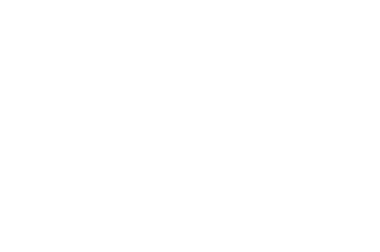

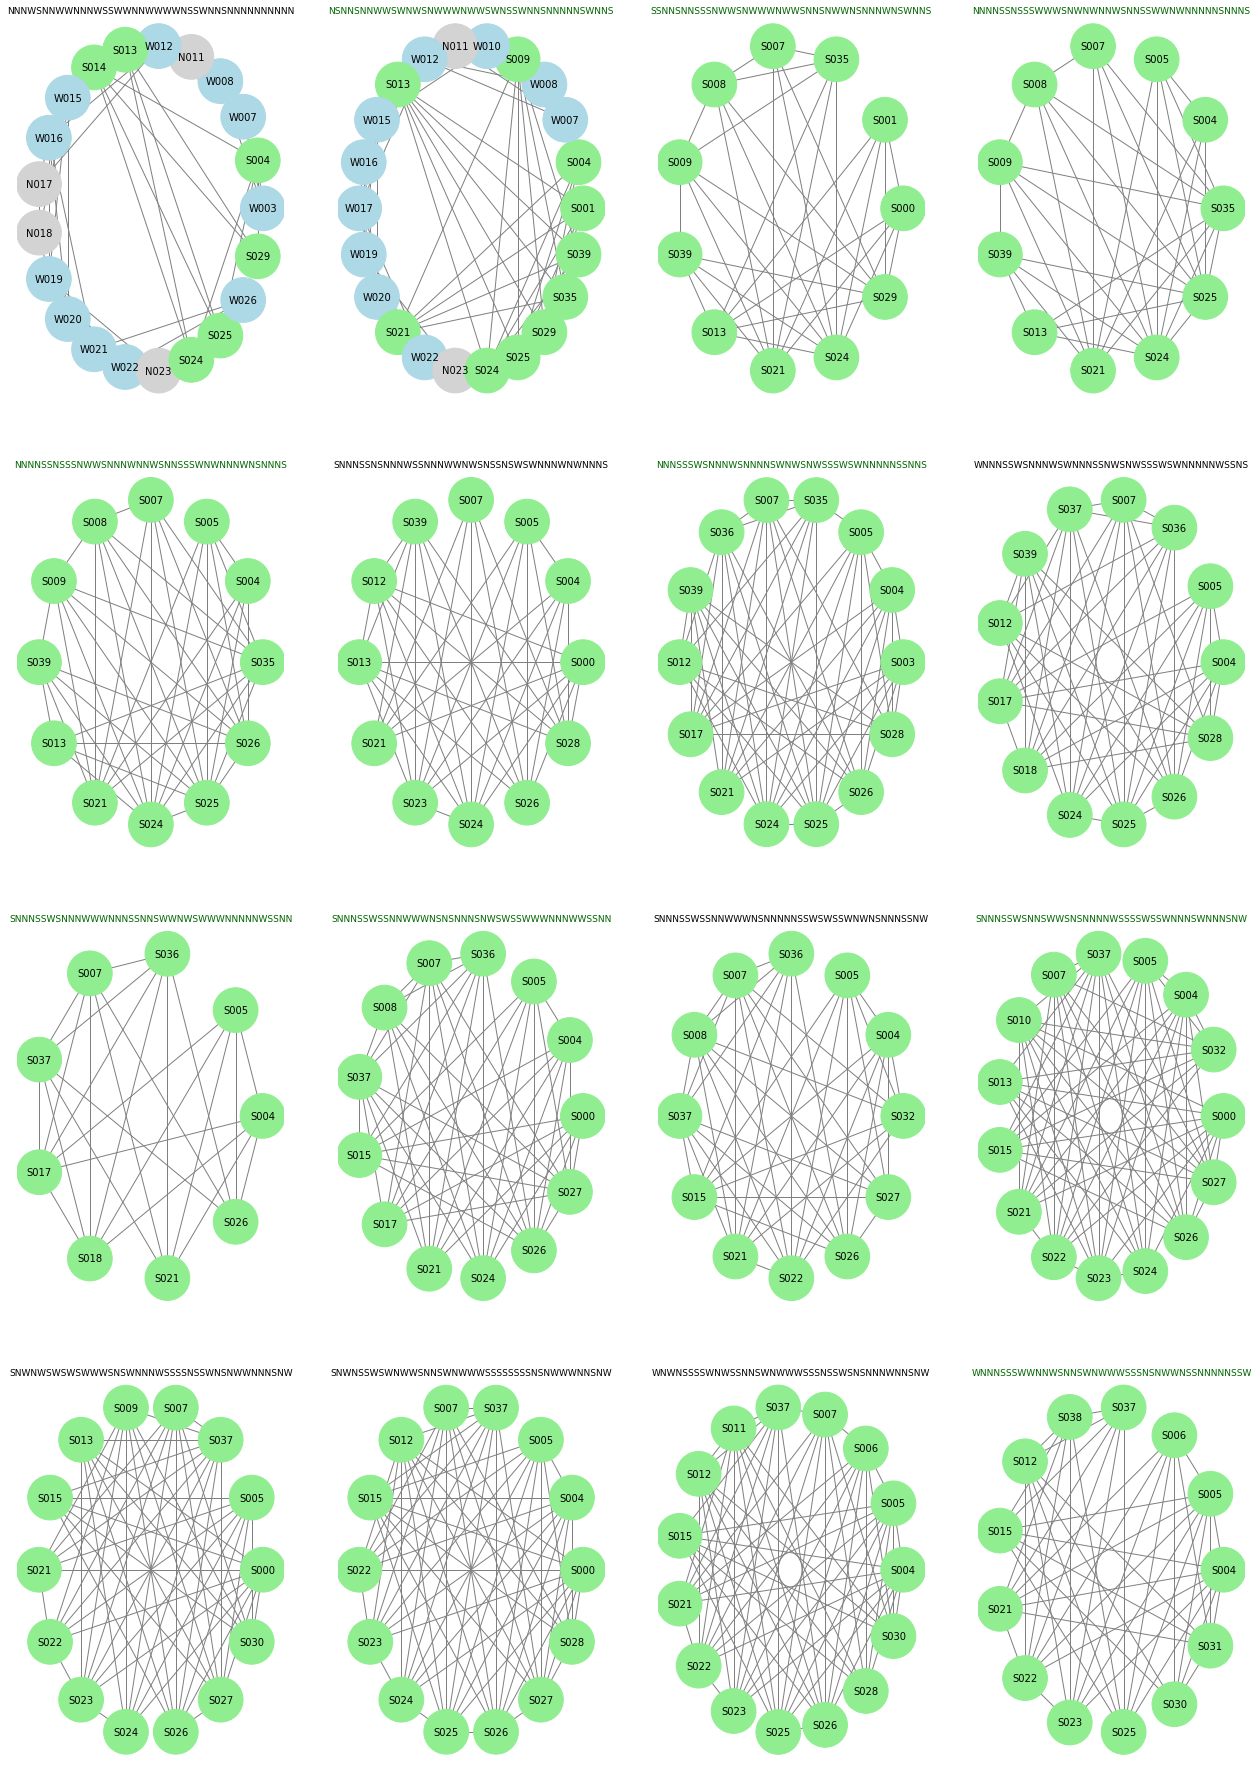

In [111]:
random.seed(20)
node_string = random_genoid_sequence("NNNNNNNNNNWWWWWSSSS", 40) 
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_proteoid(node_string, rule, plot=False)
tolerances = {'W':20, 'N':50, 'S':10, 'avg_degree':10, 'min_degree':10}
probability_string = "NWS"
mutation_cycle(graph, c, l, k_core, node_string, labels, colors, tolerances,
               mutation_step=10, mutations_count=15, probability_string=probability_string)

# Populations of proteoids

A new step of this model would be to design populations of nucleoids, networks of networks, and study mutational cycles on them. We would see that we could group the proteoids into versions, some without fitness consequences and model the evolution of the system based on what we would call global tolerances. Perhaps the simplest and coherent thing is to model the new system as a network where each node is another network, represented this time by the metrics defined above and that intervene in the comparison of networks.

Each node would have two states (labels), with fitness consequences and without them. If we also introduce species of nodes (proteoid species) we would scale the concept to a new network. Where the types of nodes are the species combined with fitness. We could establish a model of relationship between species + fitness and scale with reuse a large part of the algorithms developed.

# Conclusions

We have only scratched the surface of a model that attempts to capture the tradeoff between robustness and evolvability that occurs at many levels in biological networks. We have tried to show that by means of graph-based computing technologies it is relatively easy to build models with enough expressivity to experiment in silico the evolution of real systems. Although arbitrariness seems to appear everywhere throughout our discourse, it is not out of the question that arbitrariness has governed the biological evolution to the present time and locus in the universe, as if some hidden stochastic mechanisms may have carried the handles taking advantage of the available ingredients in each place and at each moment.

# Outputs

In [114]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx Biomockup.ipynb 1>/dev/null 2>/dev/null
/Library/TeX/texbin/pdflatex -shell-escape Biomockup 1>/dev/null 2>/dev/null
jupyter nbconvert --to html_embed --template toc2 Biomockup.ipynb 1>/dev/null 2>/dev/null